# __Green Bonds Data Analysis Project__

Authors: Abhinav Yarlagadda and Jorge Terrazas

## __Introduction__

The primary goal of this data analysis project on green bonds is to gain insights into green bond policies, the market for green bonds, and their impact on sustainable development. Green bonds are financial instruments designed to fund projects with positive environmental benefits. By analyzing green bond datasets, we seek to visualize data regarding green bonds in a meaningful way to raise awareness on the use of green bonds as a means of advancing environmental sustainability. 

### Datasets

Green Bond Policy Dataset: Provides information regarding green bond policies across multiple countries until 2019, including links to policies and policy area among other data
* Link (from the Climate Bonds Initiative): https://www.climatebonds.net/policy/data/download

The Federal National Mortgage Association (FNMA), also known as Fannie Mae, is a government-sponsored publically traded company whose purpose is to expand the secondary mortgage market by securitizing mortgage loans as mortgage-backed securities, essentially allowing lenders to offer more mortgage loans to everyday Americans.

"Green" Mortgage-Backed Securities (MBS) are a type of MBS that provide investor insight into the environmental attributes of a property, as well as its financial attributes. Fannie Mae's Green Bond issuances are backed by current properties that are retrofitted with more environmentally friendly equipment and backed by new properties built to be more energy- and water-efficient. This practice at the macro-level results in more affordable, more sustainable homes for the future.

This publically-available dataset contains thousands of "green" MBS issuances for the purpose of more affordable, more sustainable housing. Multi-family Green MBS are specifically earmarked to provide support for the U.S. rental housing stock and for new multi-family properties.
* Link (from Fannie Mae): https://capitalmarkets.fanniemae.com/sustainable-bonds/green-bonds

### Project Design

The project design involves a main file to store all code for data analysis along with the datasets and the test datasets. The test datasets are built on the actual dataset with modified rows to replicate the proper data formatting.

For the green bond policies section, functions were used for the data analysis and visualization portions to provide replicability as needed for the test cases. After iterating the design, the functions were separated for each data summary and visualization, so calls to the function could be executed only when necessary.

For the Fannie Mae section, a function to clean the dataset and create a new dataframe was used. Then, a class contains methods to apply upon the dataframe. Finally, multiple functions were used to create the static graphs using the visualization packages. 

### Libraries

In [37]:
# import sys
#!{sys.executable} -m pip install 

# data visualization library for 2D plots
import matplotlib.pyplot as plt

# comprehensive library for mathematical functions and numerical computing
import numpy as np

# data analysis and manipulation library built on top of numpy
import pandas as pd

# library to read and write Excel files (xlsx) in Python
import openpyxl as xl

# high-level data visualization library based on matplotlib
import seaborn as sns

# high-level data visualization library for interactive plotting built on the plotly library
import plotly.express as px

# declarative data visualization library for static and interactive plotting
import altair as alt

# provides access to some variables used or maintained by the interpreter
import sys


## __Green Bond Policies__

### Dataset File I/O

In [38]:
gb_pol = pd.read_excel("gb-policy-data-20190527.xlsx")

### Displaying Data

In [39]:
display(gb_pol)

,CBID,Areas,PolicyType,Policy,Region,Country,Actor,ActorType,Date,Description,Links
0,1,Policy Signal,Special document,NGFS First Comprehensive Report (A call for ac...,Global,NaN,NGFS,Central Bank,Apr 2019,The NGFS report provides six recommendation fo...,https://www.banque-france.fr/en/financial-stab...
1,2,Policy Signal,Special document,New Zealand Reserve Bank Climate Change Strategy,Asia-Pacific,New Zealand,New Zealand Reserve Bank,Central Bank,Dec 2018,The strategy focuses on managing the bank’s di...,https://www.rbnz.govt.nz/financial-stability/c...
2,3,Issuance,Demonstration issuance,First World's Blue Bond,Africa,Africa,Republic of Seychelles,Central Government,Oct 2018,The world's first blue bond issued by the Repu...,https://www.worldbank.org/en/news/press-releas...
3,4,Policy Signal,Policy signal,Climate Financial Risk Forum,Europe,UK,Prudential Regulation Authority (PRA) and Fina...,Central Bank,Sep 2018,The objective of the CFRF is to build capacity...,https://www.fca.org.uk/news/press-releases/fir...
4,5,Standardisation,Green bond/debt guidelines,Guidelines on the Issuance of Green Bonds unde...,Asia-Pacific,Philippines,Securities and Exchange Commission Philippines,Scurities Regulator,Aug 2018,The Securities and Exchange Commission Philipp...,http://www.sec.gov.ph/wp-content/uploads/2015/...
...,...,...,...,...,...,...,...,...,...,...,...
99,100,Cooperation,Market development committee,Establishment of India Green Bond Council,Asia-Pacific,India,FICCI and CBI,Banking/Business Association,Oct 2016,The India Green Bonds Council was convened by ...,https://www.climatebonds.net/2016/10/mumbai-in...
100,101,Cooperation,Market development committee,Green Bond Private Public Sector Advisory Group,Africa,Nigeria,Ministry of Environment & Ministry of Finance,Central Government,End 2016,The Green Bond Private Public Sector Advisory ...,https://www.nipc.gov.ng/climate-bonds-welcomes...
101,102,Investment,Climate risk disclosure,Task Force on Climate-related Financial Disclo...,Global,Global,Financial Stability Board,NaN,Dec 2015,The FSB Task Force on Climate-related Financia...,https://www.fsb-tcfd.org/about/# ; http://www....
102,103,Standardisation,Green definitions,Green Bond Listing Requirements - Luxembourg,Europe,Luxembourg,Luxembourg Stock Exchange,Stock Exchange,Sep 2016,Luxembourg Stock Exchange launched the Luxembo...,https://www.bourse.lu/green


### Data Cleaning

In [40]:
# Fills in country value as global if the corresponding region value is also global
gb_pol.loc[gb_pol["Region"] == "Global", "Country"] = "Global"

# Fills in the rest of the empty cells for the Country column with the value of Unknown
gb_pol["Country"] = gb_pol["Country"].fillna("Unknown")

# Fills in the empty cells for the ActorType column with the value of Unknown
gb_pol["ActorType"] = gb_pol["ActorType"].fillna("Unknown")

# Fills in the empty cells for the Links column with the value of No Link Available
gb_pol["Links"] = gb_pol["Links"].fillna("No Link Available")

In [41]:
gb_pol.head(10)

,CBID,Areas,PolicyType,Policy,Region,Country,Actor,ActorType,Date,Description,Links
0,1,Policy Signal,Special document,NGFS First Comprehensive Report (A call for ac...,Global,Global,NGFS,Central Bank,Apr 2019,The NGFS report provides six recommendation fo...,https://www.banque-france.fr/en/financial-stab...
1,2,Policy Signal,Special document,New Zealand Reserve Bank Climate Change Strategy,Asia-Pacific,New Zealand,New Zealand Reserve Bank,Central Bank,Dec 2018,The strategy focuses on managing the bank’s di...,https://www.rbnz.govt.nz/financial-stability/c...
2,3,Issuance,Demonstration issuance,First World's Blue Bond,Africa,Africa,Republic of Seychelles,Central Government,Oct 2018,The world's first blue bond issued by the Repu...,https://www.worldbank.org/en/news/press-releas...
3,4,Policy Signal,Policy signal,Climate Financial Risk Forum,Europe,UK,Prudential Regulation Authority (PRA) and Fina...,Central Bank,Sep 2018,The objective of the CFRF is to build capacity...,https://www.fca.org.uk/news/press-releases/fir...
4,5,Standardisation,Green bond/debt guidelines,Guidelines on the Issuance of Green Bonds unde...,Asia-Pacific,Philippines,Securities and Exchange Commission Philippines,Scurities Regulator,Aug 2018,The Securities and Exchange Commission Philipp...,http://www.sec.gov.ph/wp-content/uploads/2015/...
5,6,Issuance,Project pipeline,Luxembourg Law on Renewable Energy Covered Bonds,Europe,Luxembourg,Chamber of Deputies,Central Government,Jul 2018,This is the first law in the world allowing re...,http://www.allenovery.com/publications/en-gb/P...
6,7,Instruments,Monetary policy,Green Bonds Included as Eligigle Collateral fo...,Asia-Pacific,China,PBoC,Central Bank,Jun 2018,PBoC plans to expand the guarantee scope of it...,https://www.reuters.com/article/us-china-cenba...
7,8,Instruments,Prudential regulation,Green credit included into its Macro-prudentia...,Asia-Pacific,China,PBoC,Central Bank,Jun 2018,The more green assets (green bonds/green lendi...,https://www.scmp.com/business/companies/articl...
8,9,Cooperation,Market development committee,Establishment of Technical Expert Group (TEG),Europe,Europe,European Commission,Supranational Government,Jun 2018,"In June, the EC launched a Technical Expert Gr...",https://www.climatebonds.net/resources/reports...
9,10,Issuance,Demonstration issuance,Sovreign Green Bond Framework,Europe,Lithuania,Republic of Lithuania,Central Government,May 2018,The green bond framework states that the use o...,http://www.nasdaqbaltic.com/market/?instrument...


In [42]:
# Slices the date so that the column only contains the year
gb_pol["Date"] = gb_pol["Date"].str.slice(4)

In [43]:
gb_pol.head(10)

,CBID,Areas,PolicyType,Policy,Region,Country,Actor,ActorType,Date,Description,Links
0,1,Policy Signal,Special document,NGFS First Comprehensive Report (A call for ac...,Global,Global,NGFS,Central Bank,2019,The NGFS report provides six recommendation fo...,https://www.banque-france.fr/en/financial-stab...
1,2,Policy Signal,Special document,New Zealand Reserve Bank Climate Change Strategy,Asia-Pacific,New Zealand,New Zealand Reserve Bank,Central Bank,2018,The strategy focuses on managing the bank’s di...,https://www.rbnz.govt.nz/financial-stability/c...
2,3,Issuance,Demonstration issuance,First World's Blue Bond,Africa,Africa,Republic of Seychelles,Central Government,2018,The world's first blue bond issued by the Repu...,https://www.worldbank.org/en/news/press-releas...
3,4,Policy Signal,Policy signal,Climate Financial Risk Forum,Europe,UK,Prudential Regulation Authority (PRA) and Fina...,Central Bank,2018,The objective of the CFRF is to build capacity...,https://www.fca.org.uk/news/press-releases/fir...
4,5,Standardisation,Green bond/debt guidelines,Guidelines on the Issuance of Green Bonds unde...,Asia-Pacific,Philippines,Securities and Exchange Commission Philippines,Scurities Regulator,2018,The Securities and Exchange Commission Philipp...,http://www.sec.gov.ph/wp-content/uploads/2015/...
5,6,Issuance,Project pipeline,Luxembourg Law on Renewable Energy Covered Bonds,Europe,Luxembourg,Chamber of Deputies,Central Government,2018,This is the first law in the world allowing re...,http://www.allenovery.com/publications/en-gb/P...
6,7,Instruments,Monetary policy,Green Bonds Included as Eligigle Collateral fo...,Asia-Pacific,China,PBoC,Central Bank,2018,PBoC plans to expand the guarantee scope of it...,https://www.reuters.com/article/us-china-cenba...
7,8,Instruments,Prudential regulation,Green credit included into its Macro-prudentia...,Asia-Pacific,China,PBoC,Central Bank,2018,The more green assets (green bonds/green lendi...,https://www.scmp.com/business/companies/articl...
8,9,Cooperation,Market development committee,Establishment of Technical Expert Group (TEG),Europe,Europe,European Commission,Supranational Government,2018,"In June, the EC launched a Technical Expert Gr...",https://www.climatebonds.net/resources/reports...
9,10,Issuance,Demonstration issuance,Sovreign Green Bond Framework,Europe,Lithuania,Republic of Lithuania,Central Government,2018,The green bond framework states that the use o...,http://www.nasdaqbaltic.com/market/?instrument...


### Statistical and Qualitative Analysis

These analysis methods will be implemented using functions so that they may repeated for the test cases as well as the actual data set. By generating quantitative and qualitative summaries from the dataset, we will be able to gain insights into our data that may not otherwise be captured by the charts produced for data visualization.

In [44]:
# Identifies total number of policies in given dataset
def row_count(df):
    return len(df.index)

print(f"Total Number of Green Bond Policies: {row_count(gb_pol)}") 

Total Number of Green Bond Policies: 104


In [45]:
# Counts total amount of policies for a selected country in given dataset
def policies_by_country(df, country):
    count = df['Country'].value_counts()[country]
    return count

selected_country = "USA"
print(f"Number of Green Bond Policies in {selected_country}: {policies_by_country(gb_pol, selected_country)}")

selected_country = "Brazil"
print(f"Number of Green Bond Policies in {selected_country}: {policies_by_country(gb_pol, selected_country)}")

Number of Green Bond Policies in USA: 3
Number of Green Bond Policies in Brazil: 4


In [46]:
# Counts total amount of policies for a selected policy area in given dataset
def policies_by_area(df, area):
    count = df['Areas'].value_counts()[area]
    return count

selected_area = "Standardisation"
print(f"Number of Green Bond Policies based on {selected_area}: {policies_by_area(gb_pol, selected_area)}")

selected_area = "Cooperation"
print(f"Number of Green Bond Policies based on {selected_area}: {policies_by_area(gb_pol, selected_area)}")

Number of Green Bond Policies based on Standardisation: 32
Number of Green Bond Policies based on Cooperation: 19


In [47]:
# Identifies country with the greatest amount of policies and provides the amount of policies as well
def max_country_policy(df):
    country = df['Country'].value_counts().idxmax()
    count = df['Country'].value_counts().max()
    return country, count

country, count = max_country_policy(gb_pol)
print(f"The Country with the Greatest Amount of Green Bond Policies is {country} with {count} Policies")

The Country with the Greatest Amount of Green Bond Policies is China with 30 Policies


In [48]:
# Displays a list of all the unique countries with at least 1 green bond policy in given dataset
def countries_with_policy(df):
    country_list = list(df["Country"].unique())
    return country_list

print(f"List of Countries with a Green Bond Policy: {countries_with_policy(gb_pol)}")

List of Countries with a Green Bond Policy: ['Global', 'New Zealand', 'Africa', 'UK', 'Philippines', 'Luxembourg', 'China', 'Europe', 'Lithuania', 'Hong Kong', 'Chile', 'Japan', 'Peru', 'Belgium', 'Indonesia', 'Malaysia', 'Mexico', 'Nigeria', 'Regional', 'Fiji', 'India', 'Kenya', 'Italy', 'France', 'Brazil', 'Poland', 'Sweden', 'Morocco', 'Singapore', 'USA', 'Nordics', 'Vietnam', 'Netherlands', 'Lebanon']


In [49]:
# Displays a dictionary containing policy names as keys and policy links as values for a selected country
def policy_links_for_country(df, country):
    policy_loc = df.loc[df["Country"] == country, 'Policy']
    link_loc = df.loc[df["Country"] == country, 'Links']
    links_dict = {}
    for i in range(len(policy_loc)):
        links_dict[policy_loc.iloc[i]] = link_loc.iloc[i]
    return links_dict

selected_country = "USA"
print(f"Links to Green Bond Policies in {selected_country}\n")
links_dict = policy_links_for_country(gb_pol, selected_country)
for keys, values in links_dict.items():
    print(f"{keys}: {values}")

Links to Green Bond Policies in USA

PACE (Property Assessed Clean Energy): https://www.energy.gov/eere/slsc/property-assessed-clean-energy-programs
OPIC’s Green Guaranties : https://www.opic.gov/opic-action/renewable-resources/green-guaranties
WHEEL (Warehouse for Energy Efficiency Loans): http://www.naseo.org/wheel ; https://www.climatebonds.net/files/files/-GreenSecuritization-EU_policy-paper_20_04_17-FINAL.pdf


### Data Visualization

#### Policies by Country and Region Visualization

In [50]:
def policies_vs_country(df):
    # Creates new dataframe to aggregate count of policies grouped by country
    df1 = df.groupby("Country").count().reset_index()
    df1=df1.rename(columns={"Policy": "Policy Count"})
    for i in range(len(df1["Country"])):
        region = df.loc[df["Country"] == df1["Country"][i], "Region"].iloc[0]
        df1.loc[i, "Region"] = region

    # Creates region select dropdown
    regions = list(df["Region"].unique())
    region_dropdown = alt.binding_select(options = regions, name = "Select Region ")
    region_select = alt.selection_point(fields=["Region"], bind = region_dropdown)

    # Creates bar chart with embedded region filter dropdown and set color scheme
    fig = alt.Chart(df1).mark_bar().encode(
        x = "Country",
        y = "Policy Count",
        color = alt.Color("Region", scale=alt.Scale(scheme = "dark2")) 
        ).add_params(region_select
        ).transform_filter(region_select
        ).properties(width = 700, title = "Count of Green Bond Policies vs Country by Region")
    
    alt.renderers.enable('mimetype')
    return fig

policies_vs_country(gb_pol)

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\2464344188.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Africa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


##### Analysis

* In the comprehensive view, the bar chart compares all the countries in the dataset by the amount of green bond policies they each have
    * Each of the bars are further differentiated by color according to which region each of the countries belong to
    * As depicted in the bar chart, China is a clear leader in the number of green bond policies, but there also exists many international policies indicating a global recognition for the significance of green bonds
* When the bar chart is filtered by region, the graph offers a granular view by displaying the green bond legislation in each country compared to other countries in the same region
    * Many of the countries within the same region have similar amount of green bond policies, so it is likely that geopolitical factors are in play when considering to implement green bonds 
    * However, the graph also demonstrates that developed countries are not necessarily ahead of developing countries in integrating green bonds, so prioritizing sustainability in legisliation will likely make the most impact in the use of green bonds by each country

#### Policies by Policy Area Visualization

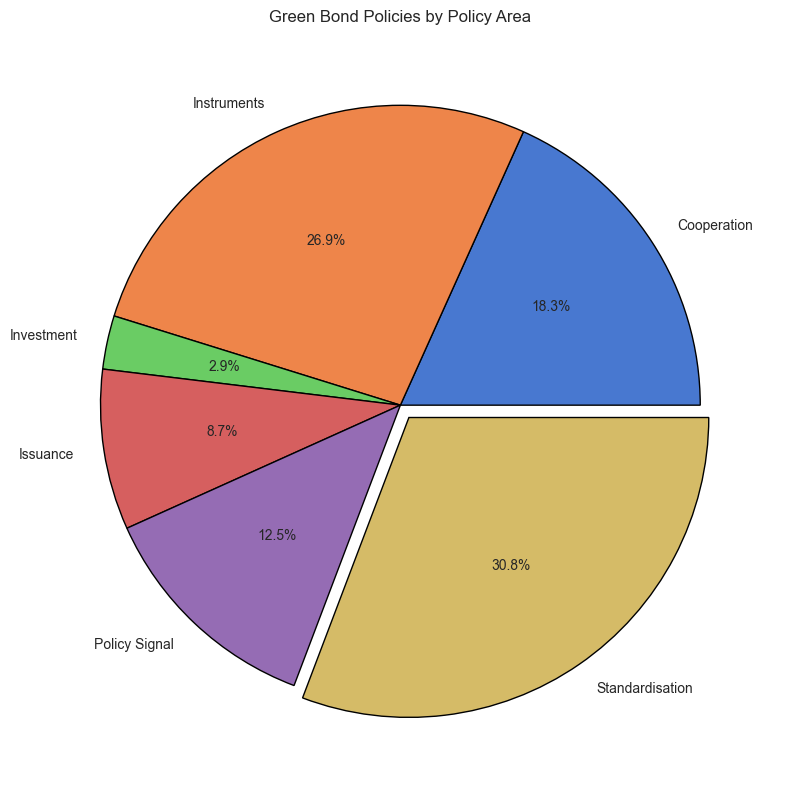

In [51]:
def policies_vs_area(df):
	# Creates new dataframe to aggregate count of policies grouped by area
	df1 = df.groupby("Areas").count().reset_index()
	
	# Generates pie chart 
	slices = list(df1["Policy"])
	labels = list(df1["Areas"].unique())
	explode = [0, 0, 0, 0, 0, 0.05]
	sns.set_style("whitegrid")
	colors = sns.color_palette("muted")[0:5]
	colors.append(sns.color_palette("muted")[8])
	plt.pie(slices, labels = labels, 
		colors = colors, wedgeprops = {"edgecolor": "black"}, 
		explode = explode, autopct = "%1.1f%%")
	plt.title("Green Bond Policies by Policy Area")
	plt.tight_layout()
	plt.show()
	
policies_vs_area(gb_pol)

##### Analysis

* Each slice on the pie chart depicts the share of green bond policies associated with each policy area
* The standardisation policy area is associated with the largest amount of policies, implying that governmental bodies are attempting to streamline of the use of green bonds, as green bonds often entail complex designs and partnerships to implement
* The instruments slice illustrates that legislation is linking green bonds with policy making as government are trying to incentivize the use of green bonds to advance sustainability oriented goals
* Many of these green bond policies are also cooperative, highlighting that green bonds are relevant tools for international initiatives, which is particularly important since climate change is a global problem that will require a coordinated effort from various countries to address
* Yet, there are not many green bond policies related to investing
    * Something countries will likely need to focus on in the future to drive sustainable change is to enhance regulations and disclosure requirements regarding green bonds for better transparency, thereby attracting more investors

#### Policies over Time Visualization

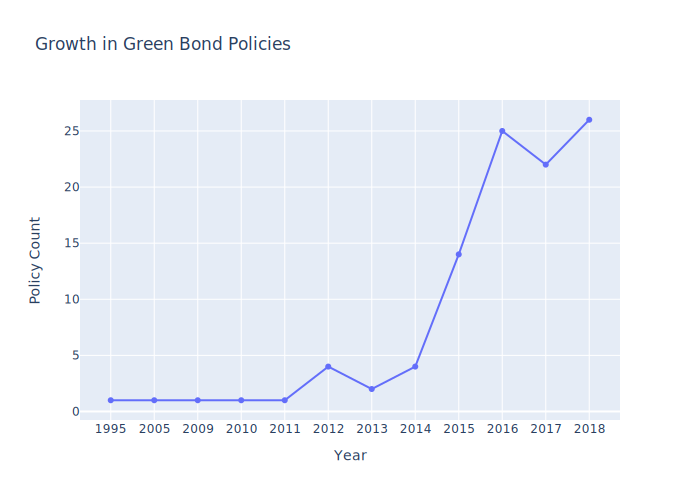

In [52]:
def policies_by_date(df):
    # Creates new dataframe to aggregate count of policies grouped by and sorted by Date
    df1 = df.groupby("Date").count().reset_index()
    df1.sort_values(by=["Date"])
    df1=df1.rename(columns={"Policy": "Policy Count"})
    df1=df1.rename(columns={"Date": "Year"})

    # Removes 2019 since data for that year is incomplete and would skew the graph
    df1 = df1.drop(df1[df1["Year"] == "2019"].index)
    
    # Generates line graph
    fig = px.line(df1, x = "Year", y = "Policy Count", title = "Growth in Green Bond Policies", markers=True)
    
    # Renders static svg image for display purposes in GitHub
    fig.show("svg")

policies_by_date(gb_pol)

##### Analysis

* While the framework for green bonds has existed since 1995 as illustrated by the line plot, there has been a sharp increase in the amount of green bond policies in the past decade
    * The rapid growth in green bond policies can likely be attributed to the heightened awareness to the escalating threat of climate change in the recent past and the use of green bonds as a mechanism to address the issue
    * Based on the current trend, the amount of green bond policies will likely experience a further surge as government bodies focus on driving sustainable change, leading to more countries adopting green bonds

### Test Cases

#### Test Data I/O and Cleaning

In [53]:
# reads in test dataset as a pandas dataframe
gb_test = pd.read_excel("gb-policy-test-data.xlsx")

# Fills in country value as global if the corresponding region value is also global
gb_test.loc[gb_test["Region"] == "Global", "Country"] = "Global"

# Fills in the rest of the empty cells for the Country column with the value of Unknown
gb_test["Country"] = gb_test["Country"].fillna("Unknown")

# Fills in the empty cells for the ActorType column with the value of Unknown
gb_test["ActorType"] = gb_test["ActorType"].fillna("Unknown")

# Fills in the empty cells for the Links column with the value of No Link Available
gb_test["Links"] = gb_test["Links"].fillna("No Link Available")

# Slices the date so that the column only contains the year
gb_test["Date"] = gb_test["Date"].str.slice(4)

In [54]:
gb_test.head(5)

,CBID,Areas,PolicyType,Policy,Region,Country,Actor,ActorType,Date,Description,Links
0,1,Policy Signal,Special document,NGFS First Comprehensive Report (A call for ac...,Global,Global,NGFS,Central Bank,2019,The NGFS report provides six recommendation fo...,https://www.banque-france.fr/en/financial-stab...
1,2,Policy Signal,Special document,New Zealand Reserve Bank Climate Change Strategy,Asia-Pacific,New Zealand,New Zealand Reserve Bank,Central Bank,2018,The strategy focuses on managing the bank’s di...,https://www.rbnz.govt.nz/financial-stability/c...
2,3,Issuance,Demonstration issuance,First World's Blue Bond,Africa,Africa,Republic of Seychelles,Central Government,2018,The world's first blue bond issued by the Repu...,https://www.worldbank.org/en/news/press-releas...
3,4,Policy Signal,Policy signal,Climate Financial Risk Forum,Europe,UK,Prudential Regulation Authority (PRA) and Fina...,Central Bank,2018,The objective of the CFRF is to build capacity...,https://www.fca.org.uk/news/press-releases/fir...
4,5,Standardisation,Green bond/debt guidelines,Guidelines on the Issuance of Green Bonds unde...,Asia-Pacific,Philippines,Securities and Exchange Commission Philippines,Scurities Regulator,2018,The Securities and Exchange Commission Philipp...,http://www.sec.gov.ph/wp-content/uploads/2015/...


#### Test Quantitative Analysis

In [55]:
# Tests row_count method
print(f"Total Number of Green Bond Policies: {row_count(gb_test)}") 
total_count = 80
if row_count(gb_test) == total_count:
    print("True")
else:
    print("False")

Total Number of Green Bond Policies: 80
True


In [56]:
# Tests policies_by_country method
selected_country = "Brazil"
country_count = 3
print(f"Number of Green Bond Policies in {selected_country}: {policies_by_country(gb_test, selected_country)}")
if policies_by_country(gb_test, selected_country) == country_count:
    print("True")
else:
    print("False")

Number of Green Bond Policies in Brazil: 3
True


In [57]:
# Tests policies_by_area method
selected_area = "Cooperation"
area_count = 15
print(f"Number of Green Bond Policies based on {selected_area}: {policies_by_area(gb_test, selected_area)}")
if policies_by_area(gb_test, selected_area) == area_count:
    print("True")
else:
    print("False")

Number of Green Bond Policies based on Cooperation: 15
True


In [58]:
# Tests max_country_policy method
max_country = "China"
max_count = 22
test_country, test_count = max_country_policy(gb_test)
print(f"The Country with the Greatest Amount of Green Bond Policies is {test_country} with {test_count} Policies")
if test_country == max_country and max_count == test_count:
    print("True")
else:
    print("False")

The Country with the Greatest Amount of Green Bond Policies is China with 22 Policies
True


#### Test Data Visualization

In [59]:
# Tests policies_vs_country visualization
policies_vs_country(gb_test)

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\2464344188.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Africa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


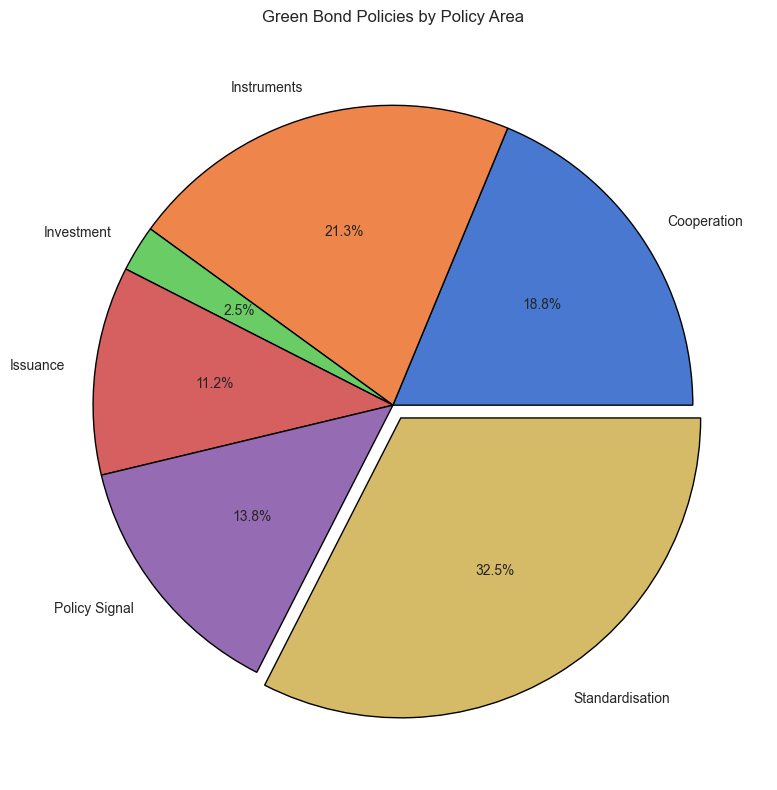

In [60]:
# Tests policies_vs_area visualization
policies_vs_area(gb_test)

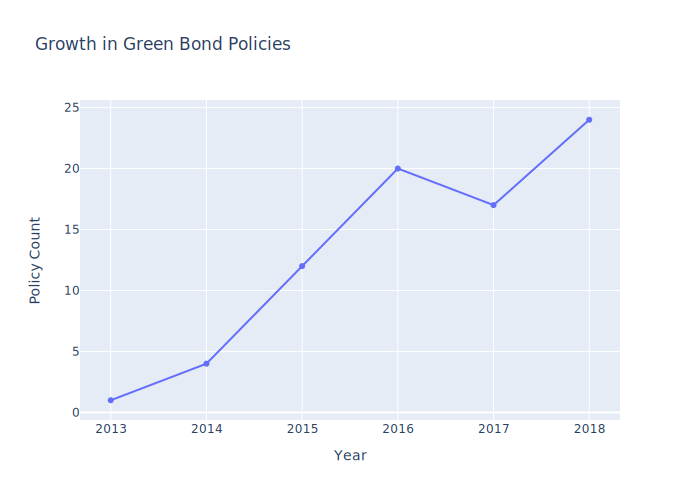

In [61]:
# Tests policies_by_date visualization
policies_by_date(gb_test)

## __Fannie Mae Multi-Family Green Mortgage-Backed Securities__

### Original Dataframe Before Cleaning

In [62]:
original_df = pd.read_csv('MF-green-MBS.csv')

display(original_df)

,Fannie Mae Projected Environmental Impact At Issuance Per CUSIP: Multifamily Green MBS(1)(2),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2012-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,© 2023 Fannie Mae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Security CUSIP,(notes),Green Financing Type,Issue Date,Issuance UPB\n($USD),Estimated Annual \nEnergy Savings (3)(4)\n(kBTU),Estimated Annual \nEmissions Savings (3)\n(MTC...,Estimated Annual \nWater Savings (3)\n(gallons),NaN,NaN
4,3140LH2R0,NaN,Green Building Certification,1 Dec 2022,"34,142,000","1,240,031",58,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4657,3138L1LY3,NaN,Green Building Certification,1 Nov 2012,"6,225,000","736,704",83,-,NaN,NaN
4658,3138L1TW9,NaN,Green Building Certification,1 Nov 2012,"26,400,000","3,639,279",410,-,NaN,NaN
4659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset File I/O and Cleaning

In [63]:
def new_dataframe(filename):
    """
    This function will read-in and clean the .csv file to create
    a new, clean dataframe object on which to perform functions on.
    """

    # Read-in the .csv file
    df = pd.read_csv(filename)

    df.drop([0, 1, 2], inplace= True) # Drop irrelevant rows

    # Make the first row the new column labels
    new_header = df.iloc[0]
    df.columns = new_header

    # Clean up the columns
    df.drop(['(notes)'], axis = 1, inplace = True)
    df.drop(df.columns[[7, 8]], axis = 1, inplace = True)
    # Drop first row (duped labels)
    df.drop([3], inplace = True) 

    # Fill NaN values with 0
    df.fillna(0, inplace = True) 

    # Rename the columns
    df.columns = ['CUSIP','Financing Type','Issue Date','Principal $',
                'Energy Savings kBTU',    'Emissions Savings MTCO2e',
                'Water Savings Gallons']
    
    # Remove thousands separators
    df.replace(',','', regex = True, inplace = True)

    # Adjust for null values
    df.replace(' -   ', 0 , regex = True, inplace = True)

    # Convert numerical strings to integer type
    df['Principal $'] = df['Principal $'].astype(int)
    df['Energy Savings kBTU'] = df['Energy Savings kBTU'].astype(int)
    df['Emissions Savings MTCO2e'] = df['Emissions Savings MTCO2e'].astype(int)
    df['Water Savings Gallons'] = df['Water Savings Gallons'].astype(int)

    return df

new_dataframe('MF-Green-MBS.csv')

,CUSIP,Financing Type,Issue Date,Principal $,Energy Savings kBTU,Emissions Savings MTCO2e,Water Savings Gallons
4,3140LH2R0,Green Building Certification,1 Dec 2022,34142000,1240031,58,0
5,3140LH5K2,Green Building Certification,1 Dec 2022,82180000,7543701,292,0
6,3140LHUA6,Green Building Certification,1 Dec 2022,34146000,5626484,283,0
7,3140LJCX2,Green Building Certification,1 Dec 2022,44845000,4361035,197,0
8,3140LJKT2,Green Building Certification,1 Dec 2022,34405000,1488646,63,0
...,...,...,...,...,...,...,...
4657,3138L1LY3,Green Building Certification,1 Nov 2012,6225000,736704,83,0
4658,3138L1TW9,Green Building Certification,1 Nov 2012,26400000,3639279,410,0
4659,0,0,0,0,0,0,0
4660,0,0,0,0,0,0,0


### Heap Class Helper - Cited in References Section

In [64]:
class Max_heap:
    '''
    Max Heap Implementation in Python: Credit to Kia Teymourian
    '''
    def __init__(self):
        '''
        On this implementation the heap list is initialized with a value
        '''
        # We do not use the index 0 
        # Index zero is always a very large number as placeholder. 
        self.heap_list = [sys.maxsize]

    @property
    def size(self):
        '''Returns the size of this heap'''
        return len(self.heap_list) - 1 
 

    def parent(self, index):
        ''' Return the parent of a node at index'''
        return index // 2


    def l_child(self, index):
        '''Return the position of the left child node of a given index'''
        return 2 * index

    def r_child(self, index):
        '''Return the position of the right child node of a given index'''
        return (2 * index) + 1

    def is_leaf(self, index):
        ''' Returns true if the given index is a leaf node'''
        return index * 2 > self.size 


    def swap(self, from_pos, to_pos):
        '''A helper function to swap two nodes of the heap'''
        self.heap_list[from_pos], self.heap_list[to_pos] = self.heap_list[to_pos], self.heap_list[from_pos]
        

    def insert(self, element):
        '''
        It inserts an element to the heap structure and maintain the heap property. 
        '''
        self.heap_list.append(element)

        current = self.size

        while (self.heap_list[current] > self.heap_list[self.parent(current)]):
            self.swap(current, self.parent(current))
            current = self.parent(current)


    def __str__(self):
        '''A simple str function to print the contents of the heap'''
        return str(self.heap_list)


    def max_heapify(self, i):
        '''
        # Function to heapify the node at index
        '''
        l = self.l_child(i)
        r = self.r_child(i)

        if l <= self.size and self.heap_list[l] > self.heap_list[i]:
            largest = l
        else:
            largest = i

        if r <= self.size and self.heap_list[r] > self.heap_list[largest]:
            largest = r 

        if largest != i :
            self.swap(i, largest)
            self.max_heapify(largest)


    def build_max_heap(self, unsorted_list):

        # Set the max possible number to the begining of the list 
        unsorted_list.insert(0, sys.maxsize)

        self.heap_list = unsorted_list

        for i in range(len(unsorted_list) // 2 , 1, -1):
            self.max_heapify(i)


    def extract_max(self):
        '''Extracts the max of this heap'''

        # 1. pop the root of the tree which is on the index 1 of the list 
        popped = self.heap_list.pop(1)
        
        # 2. Insert the last element of the heap list which is a leaf node and insert it to the root
        if(self.size > 1):
            self.insert(self.heap_list.pop())
        # 3. Call heapify() on the root to fix the error it may have caused. 
            self.max_heapify(1)
    
        return popped

### Dataframe Functions Organized in a Class: Heap-Sort & Max-Heap Implementation Used

In [65]:
class DataFunctions:

    """
    This class contains the various functions the user may
    use on their dataframe call.
    
    Functions are in a class for organization. 
    """

    def __init__(self, df_obj):
        self.df = df_obj

    def __str__(self):
        return self.df.info

    def print_x_head(self, size):
        "Print the given head size."

        print(f'Here are the top {size} rows in the dataframe.')
        print()
        print(self.df.head(size))

    def print_row_count(self):
        "Print the number of rows."

        print(f'There are {len(self.df)} total rows in the dataframe.')

    def print_largest_bond(self):
        "Prints the largest bond principal in terms of $ Dollars using MAX-HEAP using the column values."

        max_bond_heap = Max_heap()
        for amount in self.df['Principal $']:
            max_bond_heap.insert(amount)
        max_principal = max_bond_heap.extract_max()
        print(f'The highest principal issuance amount is ${max_principal:,.2f}')

    def print_top_x_principal_issuances(self, num_rows):
        "Prints the given number of rows sorted by the top principal issuance amounts using HEAP-SORT."

        principals_heap = Max_heap()
        for amount in self.df['Principal $']:
            principals_heap.insert(amount)
        principals_heap.build_max_heap(principals_heap.heap_list)
        sorted = []

        n = len(principals_heap.heap_list)
        
        # One by one extract elements
        for i in range(n - 1, 0, -1):
            principals_heap.heap_list[i], principals_heap.heap_list[0] = principals_heap.heap_list[0], principals_heap.heap_list[i]  # swap
            sorted.append(principals_heap.extract_max())

        number = 0
        sorted = sorted[1:]

        for row in range(num_rows):
            number += 1
            print(f'{number}: ${sorted[row]:,.2f}')

### Perform Functions

In [66]:
# Create New Dataframe & DataFunctions Class Object
df = new_dataframe('MF-Green-MBS.csv')
data_fun = DataFunctions(df)

data_fun.print_row_count()

print()

data_fun.print_x_head(12) # User input for 'x'

print()

data_fun.print_largest_bond() # Uses a Max-Heap Algorithm

print()

data_fun.print_top_x_principal_issuances(10) # Uses a Heap-Sort Algorithm - User input for 'x'

There are 4658 total rows in the dataframe.

Here are the top 12 rows in the dataframe.

        CUSIP                Financing Type  Issue Date  Principal $  \
4   3140LH2R0  Green Building Certification  1 Dec 2022     34142000   
5   3140LH5K2  Green Building Certification  1 Dec 2022     82180000   
6   3140LHUA6  Green Building Certification  1 Dec 2022     34146000   
7   3140LJCX2  Green Building Certification  1 Dec 2022     44845000   
8   3140LJKT2  Green Building Certification  1 Dec 2022     34405000   
9   3140LJKY1  Green Building Certification  1 Dec 2022     13010000   
10  3140LH3X6                 Green Rewards  1 Dec 2022     22554000   
11  3140LJCV6                 Green Rewards  1 Dec 2022      9000000   
12  3140LH3C2  Green Building Certification  1 Nov 2022     55170000   
13  3140LH4A5  Green Building Certification  1 Nov 2022     20210000   
14  3140LH5F3  Green Building Certification  1 Nov 2022     39958000   
15  3140LHJR2  Green Building Certification  1 

### Data Visualization

#### Energy Savings per Issuance Dollar

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\529986978.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



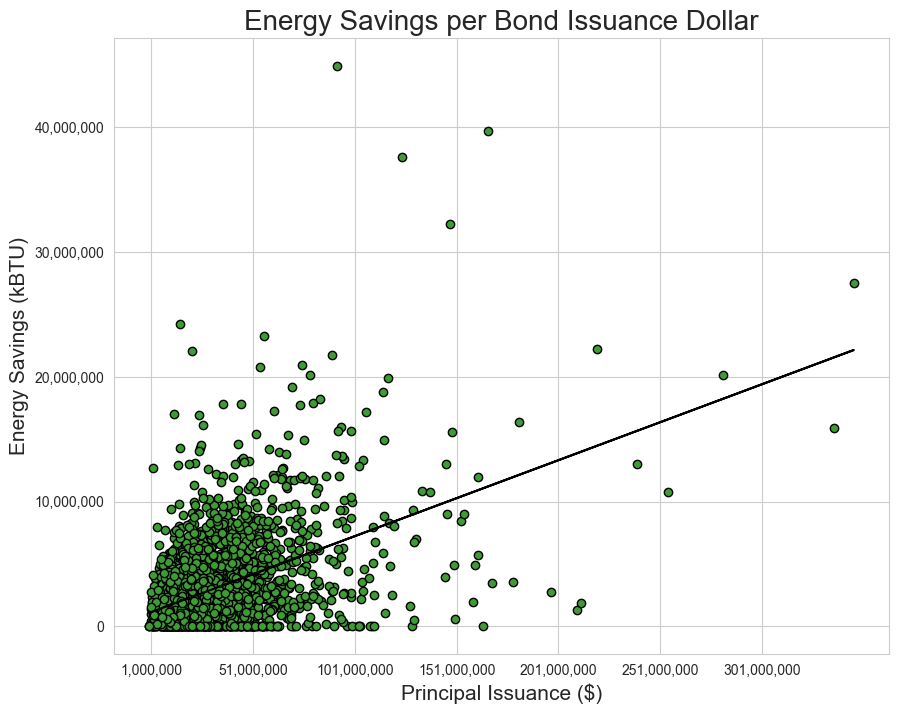

In [67]:
def issuance_energy_graph(df):
    "Scatterplot visualizing Bond Principal Issuance Amount versus Energy Savings."
    # Create the scatter
    plt.scatter(df['Principal $'],
                    df['Energy Savings kBTU'],
                    c = '#3E9C35',
                    edgecolors = '#000000')
    
    plt.title('Energy Savings per Bond Issuance Dollar', fontsize = 20)
    plt.xlabel("Principal Issuance ($)", fontsize = 15)
    plt.ylabel("Energy Savings (kBTU)", fontsize = 15)

    plt.xticks(np.arange(1000000,350000000,step = 50000000))
    plt.ticklabel_format(axis='both', style='plain')

    # Calculate the fitted line values
    m, b = np.polyfit(df['Principal $'], df['Energy Savings kBTU'], 1)

    # Plot the fitted line on the scatter plot
    plt.plot(df['Principal $'], m * df['Principal $'] + b, color = '#000000')

    # Format the y-ticker values
    y_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])

    # Format the x-ticker values
    x_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in x_values])

    plt.rcParams['figure.figsize'] = [10, 8]

    return plt.show()

issuance_energy_graph(df)

Interpretation:
As seen in the above fitted line in the scatterplot, dollars issued for Green MBS had a positive relationship with Energy Savings.

#### Water Savings per Issuance Dollar

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\3269040247.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



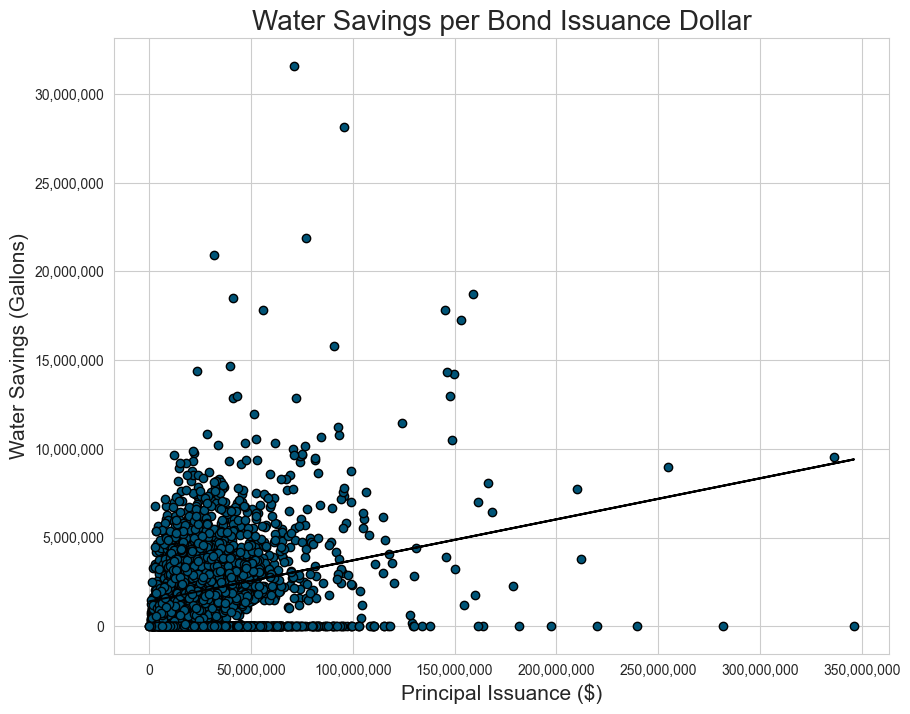

In [68]:
def issuance_water_graph(df):
    "Scatterplot visualizing Bond Principal Issuance Amount versus Water Savings."

    # Create the scatter
    plt.scatter(df['Principal $'],
                    df['Water Savings Gallons'],
                    c = '#005477',
                    edgecolors = '#000000')
    
    plt.title('Water Savings per Bond Issuance Dollar', fontsize = 20)
    plt.xlabel("Principal Issuance ($)", fontsize = 15)
    plt.ylabel("Water Savings (Gallons)", fontsize = 15)

    plt.xticks(np.arange(0, 351000000, step = 50000000))
    plt.ticklabel_format(axis='both', style='plain')

    # Calculate the fitted line values
    m, b = np.polyfit(df['Principal $'], df['Water Savings Gallons'], 1)

    # Plot the fitted line on the scatter plot
    plt.plot(df['Principal $'], m * df['Principal $'] + b, color = '#000000')

    # Format the y-ticker values
    y_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])

    # Format the x-ticker values
    x_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in x_values])

    return plt.show()

issuance_water_graph(df)

Interpretation:
As seen in the above fitted line in the scatterplot, dollars issued for Green MBS had a slightly positive relationship with Water Savings.

#### Emissions Savings per Issuance Dollar

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\1304889133.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



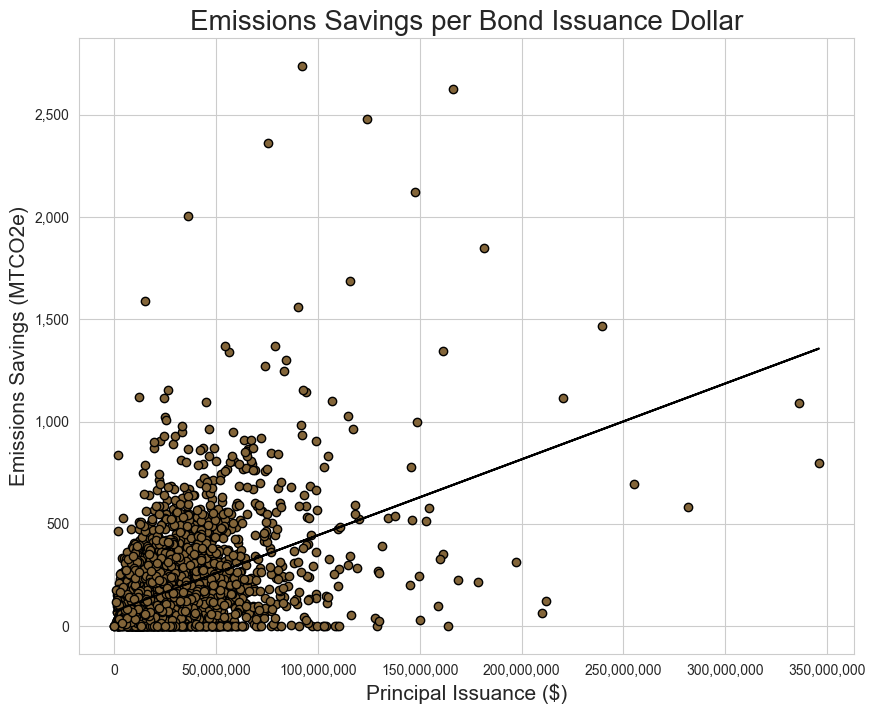

In [69]:
def issuance_emissions_graph(df):
    "Scatterplot visualizing Bond Principal Issuance Amount versus Emissions Savings."

    # Create the scatter
    plt.scatter(df['Principal $'],
                    df['Emissions Savings MTCO2e'],
                    c = '#836539',
                    edgecolors = '#000000')
    
    plt.title('Emissions Savings per Bond Issuance Dollar', fontsize = 20)
    plt.xlabel("Principal Issuance ($)", fontsize = 15)
    plt.ylabel("Emissions Savings (MTCO2e)", fontsize = 15)

    plt.xticks(np.arange(0, 351000000, step = 50000000))
    plt.ticklabel_format(axis='both', style='plain')

    # Calculate the fitted line values
    m, b = np.polyfit(df['Principal $'], df['Emissions Savings MTCO2e'], 1)

    # Plot the fitted line on the scatter plot
    plt.plot(df['Principal $'], m * df['Principal $'] + b, color = '#000000')

    # Format the y-ticker values
    y_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])

    # Format the x-ticker values
    x_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in x_values])

    return plt.show()

issuance_emissions_graph(df)

Interpretation:
As seen in the above fitted line in the scatterplot, dollars issued for Green MBS had a positive relationship with Emissions Savings.

## Test Case

In [70]:
def test_data_funcs(filename):
    "This function will test all of the DataFunction methods."

    test = new_dataframe(filename)

    test_obj = DataFunctions(test)

    test_obj.print_row_count()
    test_obj.print_x_head(5)
    test_obj.print_largest_bond()
    test_obj.print_top_x_principal_issuances(5)

test_data_funcs('Test-MF-Green-MBS.csv')

There are 19 total rows in the dataframe.
Here are the top 5 rows in the dataframe.

       CUSIP                Financing Type Issue Date  Principal $  \
4  3140LH2R0  Green Building Certification   1 Dec 22    242538299   
5  3140LH5K2  Green Building Certification   1 Dec 22    173062214   
6  3140LHUA6  Green Building Certification   1 Dec 22    165215608   
7  3140LJCX2  Green Building Certification   1 Dec 22     87686335   
8  3140LJKT2  Green Building Certification   1 Dec 22    254249709   

   Energy Savings kBTU  Emissions Savings MTCO2e  Water Savings Gallons  
4              9340180                       499                      0  
5              3087536                       300                      0  
6              5492417                       259                      0  
7              5952511                       332                      0  
8              4167872                       171                      0  
The highest principal issuance amount is $299,921,

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\529986978.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



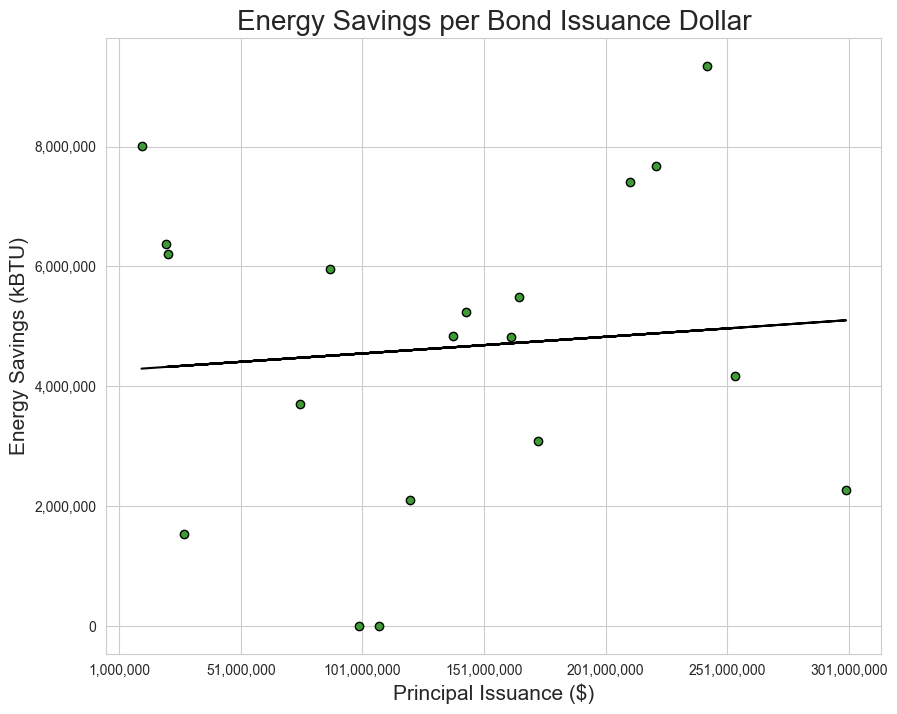

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\1304889133.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



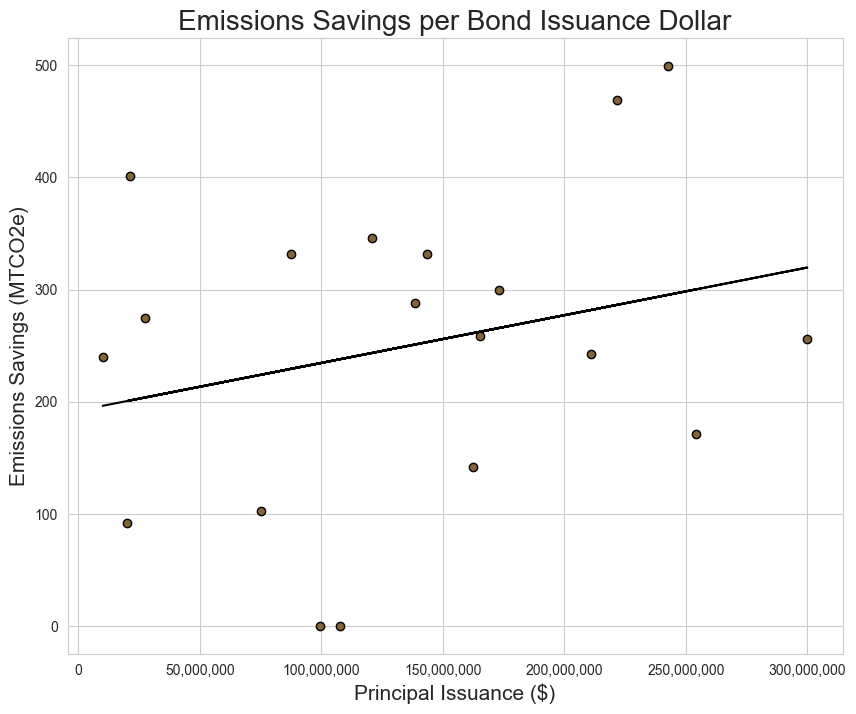

C:\Users\abhin\AppData\Local\Temp\ipykernel_22416\3269040247.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



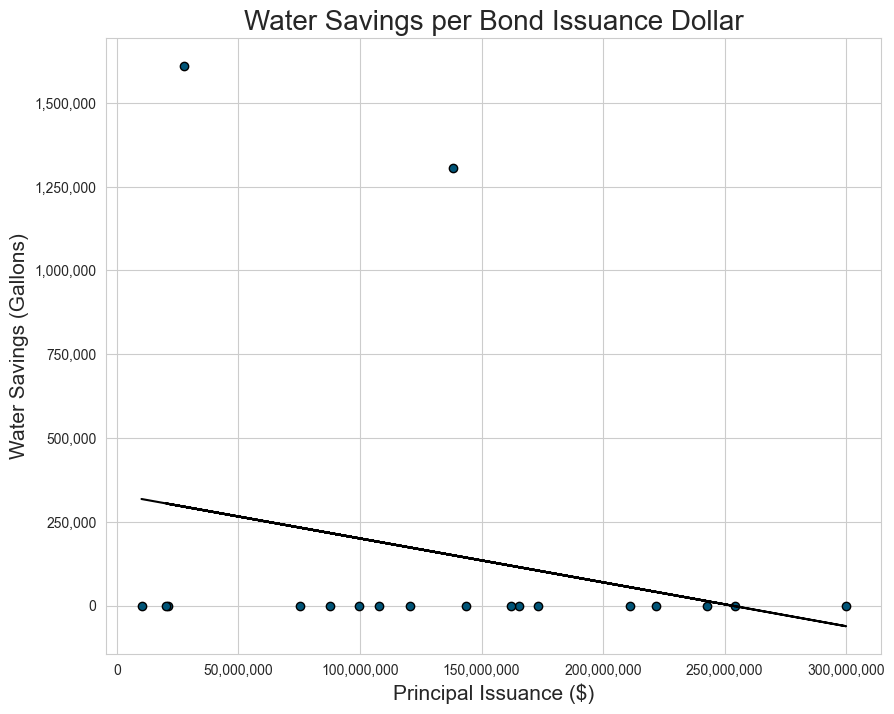

In [71]:
def test_graphs(filename):
    "This function will test all of the static graphs with new, random data."
    test_df = new_dataframe(filename)

    issuance_energy_graph(test_df)

    issuance_emissions_graph(test_df)

    issuance_water_graph(test_df)

test_graphs('Test-MF-Green-MBS.csv')

## __Program Expectations__

* The current expectations of the software is that it should be able to be replicated given that future datasets follow the previous file formatting

* Based on the test cases and the actual datasets, we believe that the program should give accurate visualizations of the data
* Furthermore, some of the methods and visualizations allow for a degree of interactivity (i.e. drop down filtering), so we expect the code to be dynamic, accounting for user inputs as given
* One of the expected weaknesses is that the data processing will not work well with different data formats as the data cleaning in the project is tailored to each specific dataset
* Another weakness is handling missing data, since we would be making assumptions when addressing whether to fill in an empty cell with a value or remove the entire row 


## __References__

* Max_heap Class from Course GitHub: https://github.com/kiat/Elements-of-Software-Design/blob/main/example_009_3_heap.py
* Heap Sort from GeeksforGeeks: https://www.geeksforgeeks.org/heap-sort/
* Pandas Documentation: https://pandas.pydata.org/docs/
* NumPy Documentation: https://numpy.org/doc/
* Matplotlib Documentation: https://matplotlib.org/stable/index.html
* Seaborn Documentation: https://seaborn.pydata.org/
* Altair Documentation: https://altair-viz.github.io/user_guide/data.html#user-guide-data
* Plotly Documentation: https://plotly.com/python/